<a href="https://colab.research.google.com/github/Jerrydcw/Data-Analysis-Python/blob/main/DEEP_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEPP FINAL PROJECT


## BUSINESS BACKGROUND
data delay pesawat pada tahun 2015 di US.
1. apa penyebab dari delaynya pesawat pada tahun 2015?
2. bandara mana yang paling sering mengalami delay?
3. maskapai mana yang sering mengalami delay?

## DATA

flight data 2015
/content/drive/MyDrive/DEEPP/flights.csv

data dictionary
- airline /content/drive/MyDrive/DEEPP/airlines.csv
- airport /content/drive/MyDrive/DEEPP/airports.csv
- cancellation codes /content/drive/MyDrive/DEEPP/cancellation_codes.csv

## 1. PREPARE

In [ ]:
!pip install pandas
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## 2. DICTIONARY

### AIRLINE DICTIONARY

In [ ]:
ad = pd.read_csv('/content/drive/MyDrive/DEEPP/airlines.csv')
ad

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


### AIRPORTS DICTIONARY

In [ ]:
apd = pd.read_csv('/content/drive/MyDrive/DEEPP/airports.csv')
apd

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


### CANCELATION CODE DICTIONARY

In [ ]:
cc = pd.read_csv('/content/drive/MyDrive/DEEPP/cancellation_codes.csv')
cc

,CANCELLATION_REASON,CANCELLATION_DESCRIPTION
0,A,Airline/Carrier
1,B,Weather
2,C,National Air System
3,D,Security


### FLIGHT DICTIONARY

In [ ]:
fd = pd.read_csv('/content/drive/MyDrive/DEEPP/flights.csv')
fd.head(10)

<ipython-input-5-fa997e57ef1e>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  fd = pd.read_csv('/content/drive/MyDrive/DEEPP/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


###FLIGHT DATA INFO

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

## DATA CELANING

In [ ]:
df_cleaning = fd.copy()

merapihkan info dari data

In [ ]:
# check typo di setiap column

# AIRLINE TYPO

df_cleaning['AIRLINE'].value_counts()



WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

In [ ]:
# ORIGIN_AIRPORT typo

df_cleaning['ORIGIN_AIRPORT'].value_counts()

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
11503         1
14222         1
13964         1
13459         1
12265         1
Name: ORIGIN_AIRPORT, Length: 930, dtype: int64

In [ ]:
# DESTINATION_AIRPORT typo

df_cleaning['DESTINATION_AIRPORT'].value_counts()

ATL      346904
ORD      285906
DFW      239582
DEN      196010
LAX      194696
          ...  
13964         1
14025         1
15497         1
12265         1
10666         1
Name: DESTINATION_AIRPORT, Length: 930, dtype: int64

In [ ]:
# mengecak Null/Nan
# karena banyak row Null, namun memliki maksud kenapa row tersebut Null maka semua row Null akan saya isi 0

df_cleaning.isnull().sum()

# TAIL_NUMBER memliki row Null karena penerbangan tersebut adalah penerbangan yang di Canceled

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [ ]:
# Check duplicated

# FLIGHT_NUMBER di setiap penerbangan memiliki flight number yang harus berbeda di setiap penerbangan

df_cleaning.loc[df_cleaning.duplicated()]

# Tidak terdapat duplicated pada df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


## HASIL TEMUAN



1. Memperbaiki jenis data
2. Row kosong atau Nan/Null ganti menjadi 0
3. TIDAK terdapat TYPO
4. TIDAK terdapat DUPLICATED

LANGKAH YANG HARUS DI AMBIL DALAM CLEANING
1. Row kosong atau Nan/Null ganti menjadi 0
2. memperbaiki jenis data


In [ ]:
# merubah row Nan/Null menjadi 0

df_cleaning = df_cleaning.fillna(0)


In [ ]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
df_cleaning.isnull().sum()

# good tidak ada Nan/Null

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [ ]:
# memperbaiki jenis data

df_cleaning2 = df_cleaning.copy()

In [ ]:
df_cleaning2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

## ANALISIS

In [ ]:
df1 = df_cleaning2.copy()

In [ ]:
df1['CANCELLED'].sum()

# terdapat 90k penerbangan yang di cancelled salama periode 2015 dari 5.819.079 penerbangan

89884

In [ ]:
df1.shape[0]

5819079

<ipython-input-30-f4e539338961>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


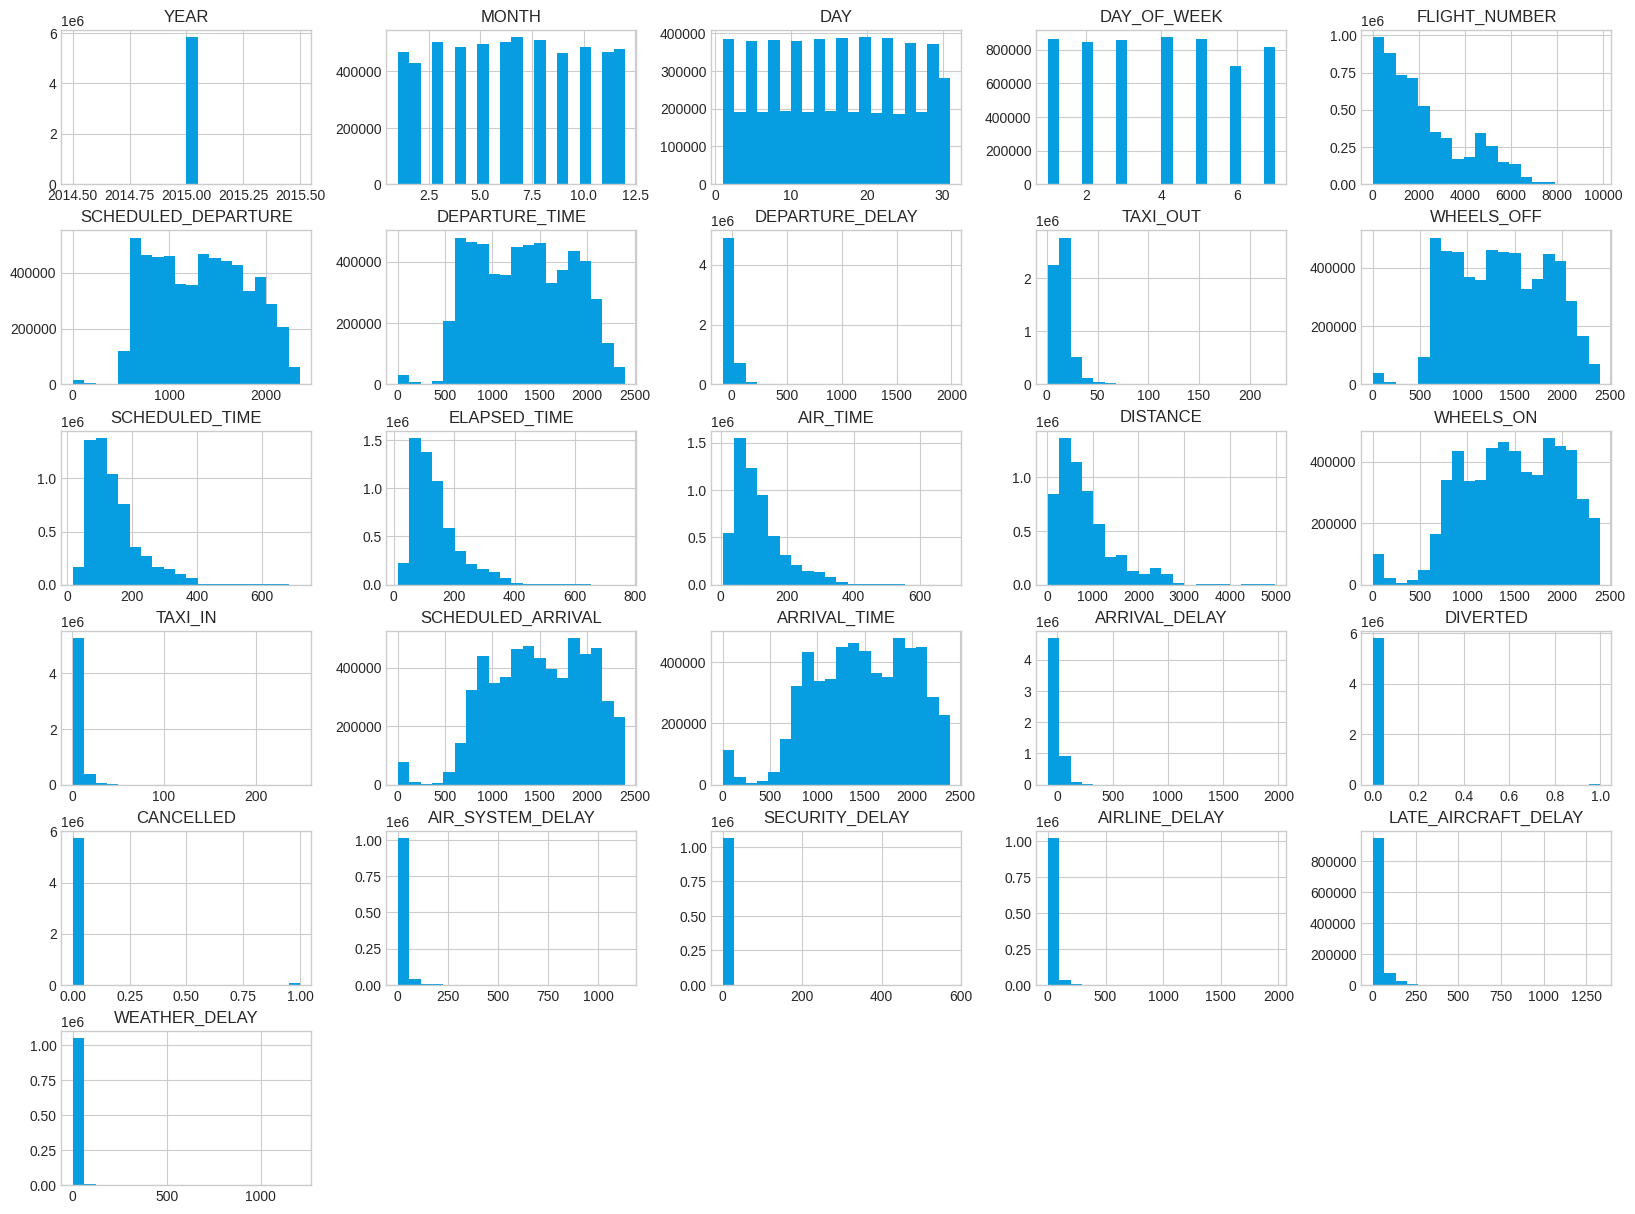

In [ ]:
plt.style.use('seaborn-whitegrid')

df1.hist(bins=20, figsize=(20,15), color='#069EE1')
plt.show();

In [ ]:
df1['SECURITY_DELAY'].sum().astype('int')

80985

In [ ]:
df1['AIRLINE_DELAY'].sum().astype('int')

20172956

In [ ]:
df1['LATE_AIRCRAFT_DELAY'].sum().astype('int')

24961931

In [ ]:
df1['WEATHER_DELAY'].sum().astype('int')

3100233

insigt
1. terdapat 90k penerbangan yang di cancelled salama periode 2015 dari 5.819.079 penerbangan

2. 14335762 menit delay di tahun 2015 yang di sebabkan AIR_SYSTEM_DELAY

3. 80985 menit delay yang di sebabkan SECURITY_DELAY

4. 20172956 menit delay yang di sebabkan AIRLINE_DELAY

5. 24961931 menit delay yang di sebabkan LATE_AIRCRAFT_DELAY

6. 3100233 menit delay yang di sebabkan WEATHER_DELAY

### Top 10 Airport

In [ ]:
merged_data = pd.merge(df1, apd, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')

In [ ]:
top_airport = merged_data['AIRPORT'].value_counts()

# menghitung jumlah kunjungan di airport

In [ ]:
top_airpots1 = top_airport.head(10)

<Axes: >

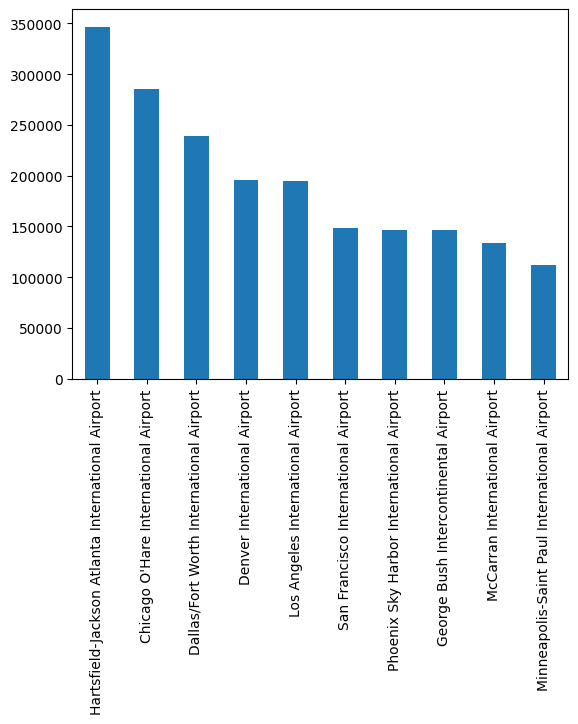

In [ ]:
top_airpots1.plot.bar()

1. tercatat di google bahwa jackson atlanta international airport adalah bandara tersibuk di dunia, walaupun bandara tersebut memiliki 4 atau 5 run way

### Total Flight

<Axes: ylabel='MONTH_YEAR'>

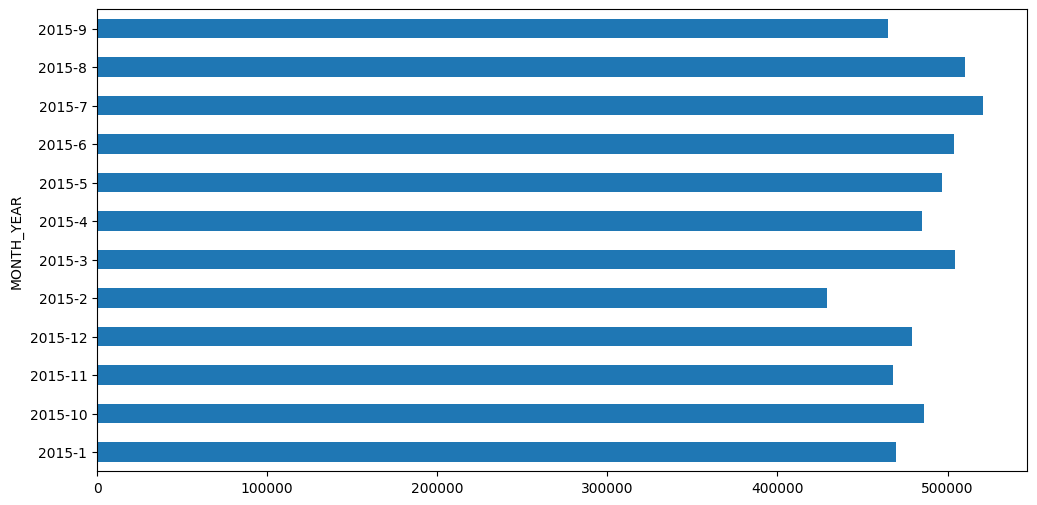

In [ ]:
# jumlah penerbangan per bulan

df1['MONTH_YEAR'] = df1['YEAR'].astype(str) + '-' + df1['MONTH'].astype(str)

flights_per_month = df1.groupby('MONTH_YEAR').size()

plt.figure(figsize=(12, 6))
flights_per_month.plot.barh()

insight
1. penerbangan meningkat dari bulan 6 kemudian bulan 7 dan menurun di bulan 8
2. pada bulan 2 terjadi penuruan drastis kemudian meningkat perat di bulan 3

<Axes: >

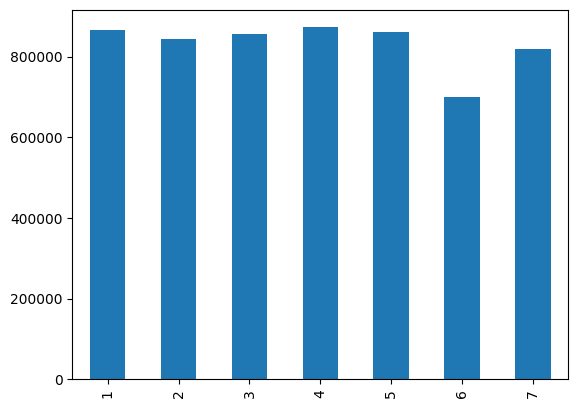

In [ ]:
# jumlah penerbangan hari per minggu

df1['DAY_OF_WEEK'].value_counts().sort_index().plot.bar()



### Cancelled Airline

<Axes: xlabel='AIRLINE'>

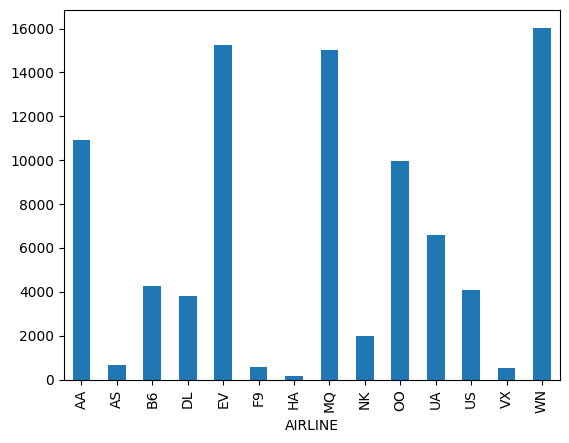

In [ ]:
# total cancel per airline

df1.groupby('AIRLINE')['CANCELLED'].sum().plot.bar()

maskapai yang sering terjadi canceled adalah WIN
saya tidak berfokus kepada canceled problem

In [ ]:
# cancelled reason per airline
df2 = df_cleaning2.copy()

In [ ]:
# memfilter penerbangan yang di cancelled, penerbangan yang di cancelled berisi 1 jika tidak di cancelled 0
cancelled_flights = df2[df2['CANCELLED'] == 1]

merged_df = pd.merge(cancelled_flights, cc, left_on='CANCELLATION_REASON', right_on='CANCELLATION_REASON')

final_df = pd.merge(merged_df, ad, left_on='AIRLINE', right_on='IATA_CODE')

final_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_DESCRIPTION,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,1,A,NaN,NaN,NaN,NaN,NaN,Airline/Carrier,AS,Alaska Airlines Inc.
1,2015,1,8,4,AS,709,N756AS,SLC,SJC,640,...,1,A,NaN,NaN,NaN,NaN,NaN,Airline/Carrier,AS,Alaska Airlines Inc.
2,2015,1,8,4,AS,329,N756AS,SJC,SEA,1000,...,1,A,NaN,NaN,NaN,NaN,NaN,Airline/Carrier,AS,Alaska Airlines Inc.
3,2015,1,8,4,AS,452,N528AS,SEA,LAX,1110,...,1,A,NaN,NaN,NaN,NaN,NaN,Airline/Carrier,AS,Alaska Airlines Inc.
4,2015,1,8,4,AS,437,N528AS,LAX,PDX,1500,...,1,A,NaN,NaN,NaN,NaN,NaN,Airline/Carrier,AS,Alaska Airlines Inc.


<Axes: xlabel='CANCELLATION_DESCRIPTION,AIRLINE_y'>

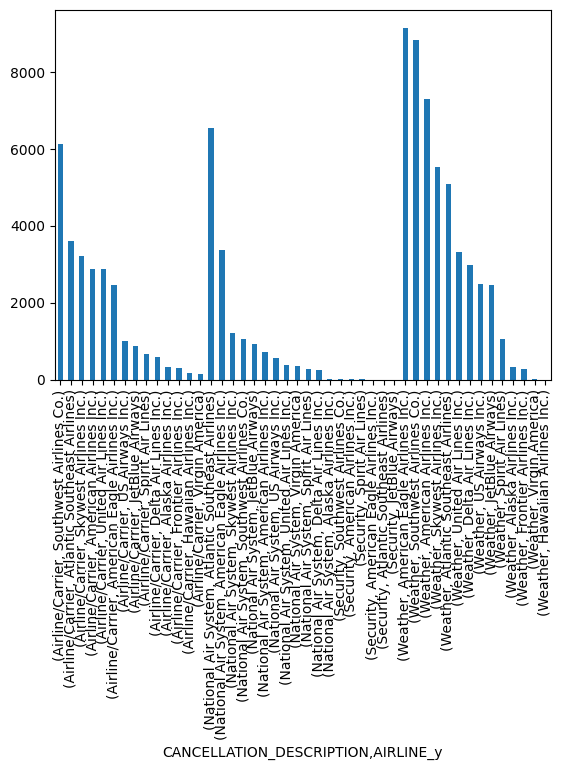

In [ ]:
final_df['AIRLINE_y'].groupby(final_df['CANCELLATION_DESCRIPTION']).value_counts().plot.bar()

In [ ]:
final_df.groupby(['CANCELLATION_DESCRIPTION'])[['AIRLINE_y']].value_counts()

CANCELLATION_DESCRIPTION  AIRLINE_y                   
Airline/Carrier           Southwest Airlines Co.          6122
                          Atlantic Southeast Airlines     3604
                          Skywest Airlines Inc.           3205
                          American Airlines Inc.          2879
                          United Air Lines Inc.           2870
                          American Eagle Airlines Inc.    2475
                          US Airways Inc.                 1007
                          JetBlue Airways                  883
                          Spirit Air Lines                 654
                          Delta Air Lines Inc.             594
                          Alaska Airlines Inc.             334
                          Frontier Airlines Inc.           308
                          Hawaiian Airlines Inc.           170
                          Virgin America                   157
National Air System       Atlantic Southeast Airlines     6544


Insight
top 3 Airline/Carrier cancelled airline
1. Southwest Airlines Co. 6.122
2. Atlantic Southeast Airlines 3.604
3. Skywest Airlines Inc. 3.205



### Delay



In [ ]:
df3 = df_cleaning.copy()

In [ ]:
#joint dua df
agg_df = pd.merge(df3, ad, left_on='AIRLINE', right_on='IATA_CODE')
agg_df.head()

In [ ]:
#final_df.groupby(['CANCELLATION_DESCRIPTION'])[['AIRLINE_y']].value_counts()

agg_df.groupby(['AIRLINE_y'])[['AIR_SYSTEM_DELAY']].sum()


,AIR_SYSTEM_DELAY
AIRLINE_y,
Alaska Airlines Inc.,301478.0
American Airlines Inc.,1760561.0
American Eagle Airlines Inc.,930774.0
Atlantic Southeast Airlines,1687894.0
Delta Air Lines Inc.,1779383.0
Frontier Airlines Inc.,581234.0
Hawaiian Airlines Inc.,6241.0
JetBlue Airways,991461.0
Skywest Airlines Inc.,1333972.0


<Axes: ylabel='AIRLINE_y'>

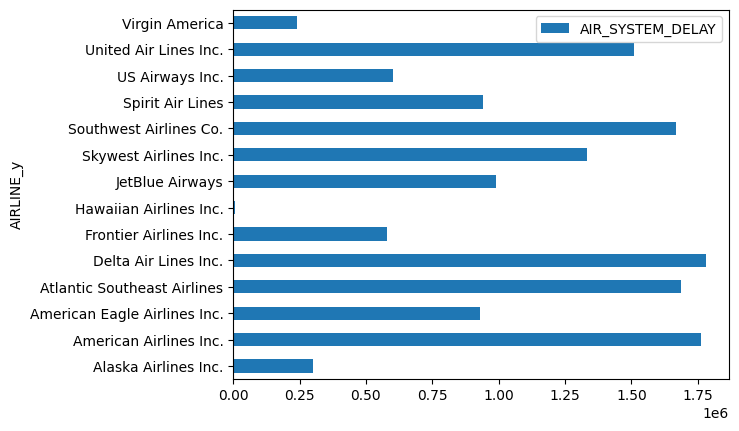

In [ ]:
## AIR_SYSTEM_DELAY

agg_df.groupby(['AIRLINE_y'])[['AIR_SYSTEM_DELAY']].sum().plot.barh()

In [ ]:
# bandara dengan jumlah delay
agg_df.groupby(['ORIGIN_AIRPORT'])[['AIR_SYSTEM_DELAY']].value_counts()


NameError: ignored

<Axes: ylabel='AIRLINE_y'>

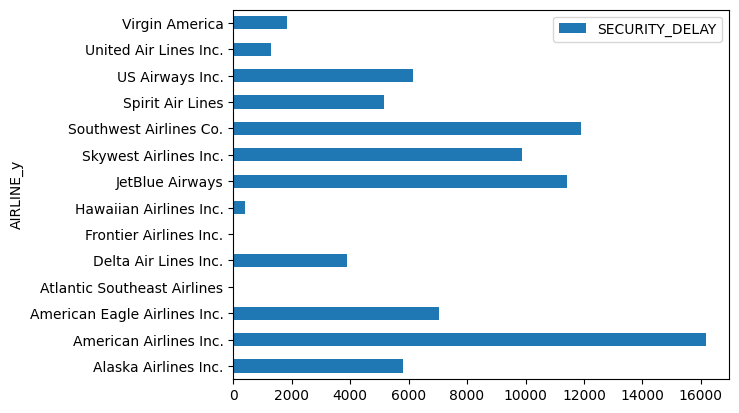

In [ ]:
## SECURITY_DELAY

agg_df.groupby(['AIRLINE_y'])[['SECURITY_DELAY']].sum().plot.barh()

<Axes: ylabel='AIRLINE_y'>

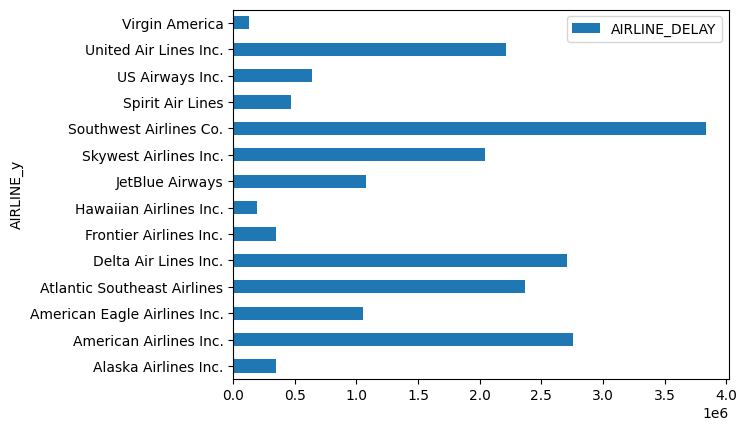

In [ ]:
## AIRLINE_DELAY

agg_df.groupby(['AIRLINE_y'])[['AIRLINE_DELAY']].sum().plot.barh()

<Axes: ylabel='AIRLINE_y'>

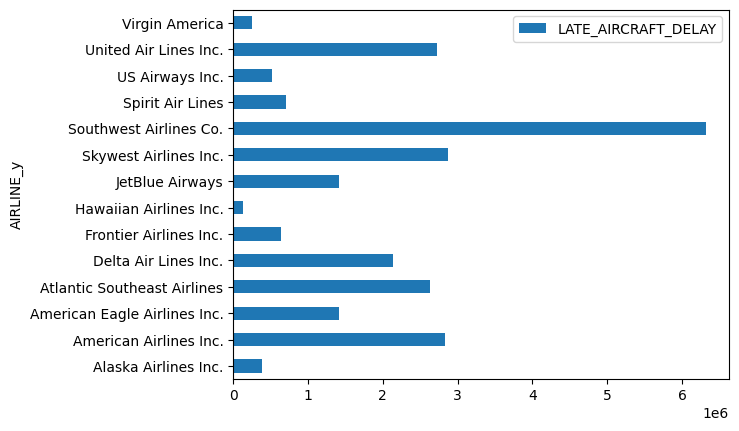

In [ ]:
## LATE_AIRCRAFT_DELAY

agg_df.groupby(['AIRLINE_y'])[['LATE_AIRCRAFT_DELAY']].sum().plot.barh()

<Axes: ylabel='AIRLINE_y'>

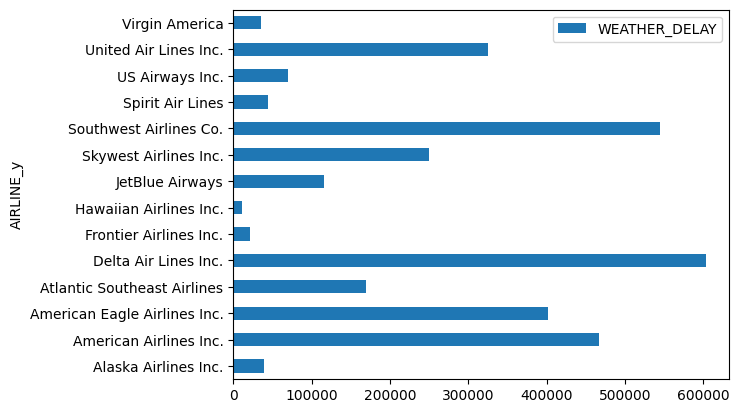

In [ ]:
## WEATHER_DELAY

agg_df.groupby(['AIRLINE_y'])[['WEATHER_DELAY']].sum().plot.barh()

In [ ]:
### saya akan mencoba agregat column yang yang saya ingin tampilkan

agg_df.groupby(['AIRLINE_y']).agg({'AIR_SYSTEM_DELAY':'sum', 'SECURITY_DELAY':'sum', 'AIRLINE_DELAY':'sum', 'LATE_AIRCRAFT_DELAY':'sum', 'WEATHER_DELAY':'sum'})

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
AIRLINE_y,,,,,
Alaska Airlines Inc.,301478.0,5825.0,347425.0,381417.0,38832.0
American Airlines Inc.,1760561.0,16158.0,2753994.0,2833302.0,467420.0
American Eagle Airlines Inc.,930774.0,7049.0,1055033.0,1417073.0,402305.0
Atlantic Southeast Airlines,1687894.0,0.0,2363973.0,2628976.0,169313.0
Delta Air Lines Inc.,1779383.0,3910.0,2707569.0,2136128.0,602901.0
Frontier Airlines Inc.,581234.0,0.0,346950.0,634039.0,21616.0
Hawaiian Airlines Inc.,6241.0,401.0,196422.0,126699.0,11429.0
JetBlue Airways,991461.0,11417.0,1074056.0,1417496.0,115770.0
Skywest Airlines Inc.,1333972.0,9896.0,2043703.0,2868684.0,250325.0
